In [1]:
# 建模调参
# 引入模块，读取数据
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间

In [2]:
def reduce_mem_usage(df):
    """
    对数据进行压缩，从而减少内存消耗
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
sample_feature = reduce_mem_usage(pd.read_csv('E:\Train_Test_data\second_hand_car\data_for_tree.csv'))

Memory usage of dataframe is 60507376.00 MB
Memory usage after optimization is: 16122229.00 MB
Decreased by 73.4%


In [5]:
sample_feature.head()

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,...,v_9,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,1.0,6,0.0,0.0,12.5,30.0,736,0.0,0,...,0.097473,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0
1,1,2.0,1,0.0,0.0,15.0,40.0,2262,-,0,...,0.020584,4756.0,4.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0
2,2,1.0,15,0.0,0.0,12.5,115.0,14874,0.0,0,...,0.027069,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0
3,3,0.0,10,0.0,1.0,15.0,109.0,71865,0.0,0,...,0.000000,7124.0,NaN,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0
4,4,1.0,5,0.0,0.0,5.0,110.0,111080,0.0,0,...,0.121521,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0


In [4]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model','brand']]
print(continuous_feature_names)
sample_feature.head()

['SaleID', 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'name', 'notRepairedDamage', 'offerType', 'power', 'seller', 'train', 'v_0', 'v_1', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'used_time', 'city', 'brand_amount', 'brand_price_max', 'brand_price_median', 'brand_price_min', 'brand_price_sum', 'brand_price_std', 'brand_price_average']


,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,...,v_9,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,1.0,6,0.0,0.0,12.5,30.0,736,0.0,0,...,0.097473,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0
1,1,2.0,1,0.0,0.0,15.0,40.0,2262,-,0,...,0.020584,4756.0,4.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0
2,2,1.0,15,0.0,0.0,12.5,115.0,14874,0.0,0,...,0.027069,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0
3,3,0.0,10,0.0,1.0,15.0,109.0,71865,0.0,0,...,0.000000,7124.0,NaN,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0
4,4,1.0,5,0.0,0.0,5.0,110.0,111080,0.0,0,...,0.121521,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0


线性回归 & 五折交叉验证 & 模拟真实业务情况

In [5]:
# 清洗特征
sample_feature = sample_feature.dropna().replace('-', 0).reset_index(drop=True)
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
train = sample_feature[continuous_feature_names + ['price']]

train_X = train[continuous_feature_names]
train_y = train['price']
train.head()

,SaleID,bodyType,fuelType,gearbox,kilometer,name,notRepairedDamage,offerType,power,seller,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,price
0,0,1.0,0.0,0.0,12.5,736,0.0,0,60,0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,1850.0
1,1,2.0,0.0,0.0,15.0,2262,0.0,0,0,0,...,4756.0,4.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,3600.0
2,2,1.0,0.0,0.0,12.5,14874,0.0,0,163,0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,6222.0
3,4,1.0,0.0,0.0,5.0,111080,0.0,0,68,0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,5200.0
4,5,0.0,1.0,0.0,10.0,137642,0.0,0,109,0,...,2482.0,3.0,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,8000.0


In [6]:
# 1.简单建模

# 引入模块
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(normalize =True)

In [8]:
model = model.fit(train_X, train_y)

In [9]:
# 查看训练的线性回归模型的截距（intercept）与权重(coef)
'intercept:'+ str(model.intercept_)

sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)


[('v_6', 3471236.27045827),
 ('v_8', 701219.1589999549),
 ('v_9', 216033.72780683057),
 ('v_12', 53628.80959221844),
 ('v_7', 40696.0854056025),
 ('v_3', 33843.73026206723),
 ('v_11', 29723.246623422965),
 ('v_13', 14151.322349795226),
 ('v_10', 13962.07229114413),
 ('v_5', 8567.159985206179),
 ('gearbox', 1085.7956282779414),
 ('seller', 930.3269644978036),
 ('fuelType', 262.4620455460061),
 ('bodyType', 202.47837662957383),
 ('city', 45.412434495677054),
 ('power', 20.466923904241625),
 ('brand_price_median', 0.647091351064251),
 ('brand_price_std', 0.4918002819037258),
 ('brand_amount', 0.17471714229947635),
 ('used_time', 0.022784275463386034),
 ('brand_price_max', 0.006845395593899416),
 ('SaleID', 1.541990951988357e-05),
 ('train', 6.809481419622898e-06),
 ('offerType', 2.3897155188024044e-06),
 ('brand_price_sum', -2.7899996082867015e-05),
 ('name', -0.00022096916533994026),
 ('brand_price_average', -0.4487633389368631),
 ('brand_price_min', -2.9097651998563774),
 ('v_14', -151.

In [10]:
from matplotlib import pyplot as plt

In [11]:
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)

绘制特征v_9的值与标签的散点图，图片发现模型的预测结果（蓝色点）与真实标签（黑色点）的分布差异较大，
且部分预测值出现了小于0的情况，说明我们的模型存在一些问题

The predicted price is obvious different from ture price


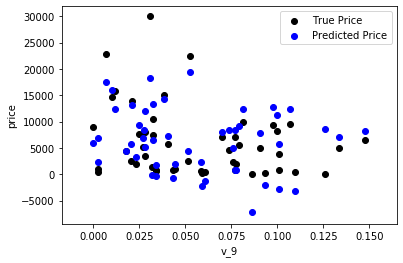

In [12]:
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index],color='black')
plt.scatter(train_X['v_9'][subsample_index],model.predict(train_X.loc[subsample_index]),color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price' , 'Predicted Price'],loc='upper right')
print('The predicted price is obvious different from ture price')
plt.show()

通过作图我们发现数据的标签（price）呈现长尾分布，不利于我们的建模预测。原因是很多模型都假设数据误差项符合正态分布，而长尾分布的数据违背了这一假设。参考博客：https://blog.csdn.net/Noob_daniel/article/details/76087829

In [13]:
import seaborn as sns

It is clear to see the price shows a typical exponential distribution


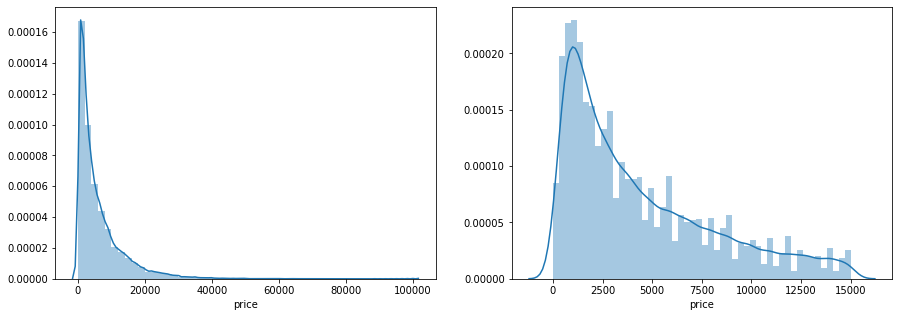

In [14]:
print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y,0.9)])
# 这句不太懂

在这里我们对标签进行log(x+1)变换，使标签贴近于正态分布

In [15]:
train_y_ln = np.log(train_y + 1)

The transformed price seems like normal distribution


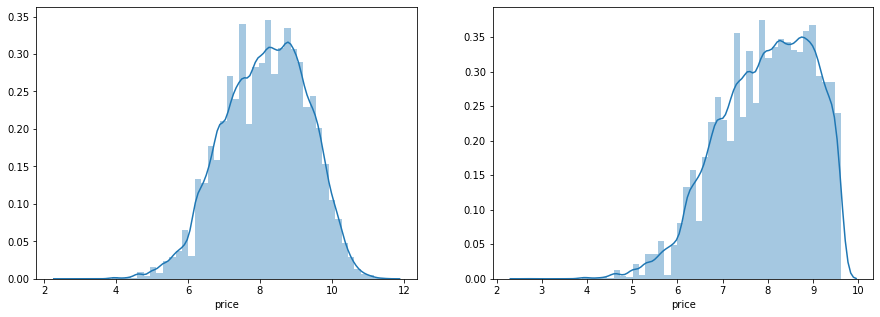

In [16]:
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln,0.9)])

In [17]:
model = model.fit(train_X, train_y_ln)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)


intercept:15.845988895718822


[('v_5', 9.742616196885402),
 ('v_9', 9.600688830948304),
 ('v_1', 1.7976343694506505),
 ('v_12', 1.7181453519617518),
 ('v_7', 1.4410946747912925),
 ('v_11', 1.0361610735543954),
 ('v_13', 0.7097218342563143),
 ('v_3', 0.5977464402651291),
 ('v_0', 0.02246966799014351),
 ('gearbox', 0.02180435387859534),
 ('v_14', 0.020608881294423842),
 ('fuelType', 0.005147616745792463),
 ('bodyType', 0.0034307236123734233),
 ('power', 0.0011003134676073475),
 ('brand_price_min', 5.7301806411507244e-05),
 ('brand_price_std', 3.886919278990442e-06),
 ('brand_amount', 2.3868449927027717e-06),
 ('brand_price_max', 8.006200553751902e-07),
 ('brand_price_average', 1.0289825040413155e-07),
 ('SaleID', 1.5685782258772753e-08),
 ('train', 4.700595468420943e-11),
 ('offerType', -5.945111070104758e-11),
 ('brand_price_sum', -1.5454476894880881e-10),
 ('name', -6.255082635410783e-08),
 ('brand_price_median', -6.523580016397312e-07),
 ('used_time', -1.3098428867149103e-06),
 ('city', -0.0025376614813707875),
 (

The predicted price seems normal after np.log transforming


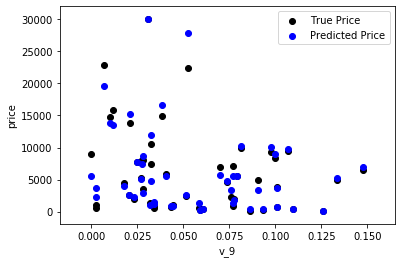

In [18]:
# 再次可视化
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

In [19]:
# 2.五折交叉验证

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,make_scorer

In [20]:
def log_transfer(func):
    def wrapper(y,yhat):
        result = func(np.log(y),np.nan_to_num(np.log(yhat)))
        return result
    return wrapper
# np.nan_to_num(x)可以将x中的nan替换为0

In [21]:
# 使用线性回归模型，对未处理标签的特征数据进行五折交叉验证（Error 1.36）
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [22]:
print('AVG:',np.mean(scores))

AVG: 1.4204444736696826


In [23]:
# 使用线性回归模型，对处理过标签的特征数据进行五折交叉验证（Error 0.19）
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [24]:
print('AVG:', np.mean(scores))

AVG: 0.19405115022216785


In [25]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv'+str(x) for x in range(1,6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.191334,0.194983,0.19514,0.191834,0.196965


In [ ]:
# 3.模拟真实业务情况-考虑进时间
# 但在事实上，由于我们并不具有预知未来的能力，五折交叉验证在某些与时间相关的数据集上反而反映了不真实的情况。
# 通过2018年的二手车价格预测2017年的二手车价格，这显然是不合理的，因此我们还可以采用时间顺序对数据集进行分隔。
# 在本例中，我们选用靠前时间的4/5样本当作训练集，靠后时间的1/5当作验证集，最终结果与五折交叉验证差距不大

In [26]:
sample_feature = sample_feature.reset_index(drop=True)
split_point = len(sample_feature)//5*4

In [27]:
train = sample_feature.loc[:split_point].dropna()
val = sample_feature.loc[split_point:].dropna()

train_X = train[continuous_feature_names]
train_y_ln = np.log(train['price']+1)
val_X = val[continuous_feature_names]
val_y_ln = np.log(val['price']+1)

In [28]:
model = model.fit(train_X , train_y_ln)

In [29]:
mean_absolute_error(val_y_ln , model.predict(val_X))

0.19697063104672521

In [30]:
# 4.绘制学习率曲线与验证曲线
from sklearn.model_selection import learning_curve,validation_curve

In [31]:
? learning_curve

In [32]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, 
                        train_size=np.linspace(.1, 1.0, 5 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            n_jobs=n_jobs, train_sizes=train_size, 
                                                            scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

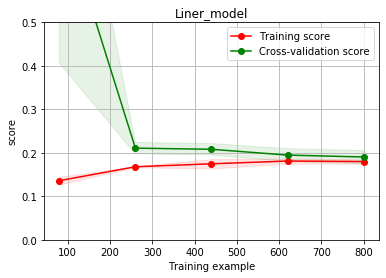

In [33]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], 
                    train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1) 

In [34]:
# 多模型对比
train = sample_feature[continuous_feature_names + ['price']].dropna()
train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y+1)

In [35]:
# 1.线性模型与嵌入性特征选择
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [36]:
models = [LinearRegression(),Ridge(),Lasso()]

In [37]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model,X=train_X , y=train_y_ln ,
                             verbose=0,cv=5 , scoring = make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name+' is finished')

LinearRegression is finished
Ridge is finished
Lasso is finished


In [38]:
result = pd.DataFrame(result)
result.index=['cv'+str(x) for x in range(1,6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.191334,0.194968,0.398161
cv2,0.194983,0.198769,0.396644
cv3,0.195140,0.198700,0.399231
cv4,0.191834,0.195336,0.392878
cv5,0.196965,0.200708,0.399253


intercept:15.845988854701153


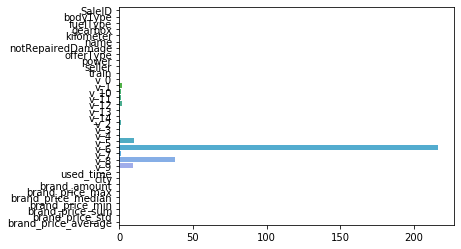

In [39]:
model = LinearRegression().fit(train_X,train_y_ln)
print('intercept:'+str(model.intercept_))
sns.barplot(abs(model.coef_),continuous_feature_names)


intercept:5.562967340544521


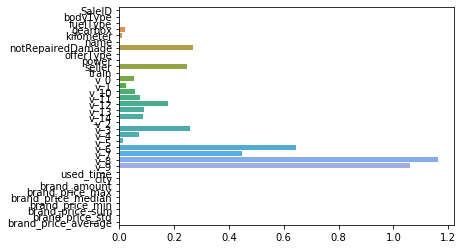

In [40]:
model = Ridge().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)
# L2正则化在拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，专业一点的说法是『抗扰动能力强』

intercept:8.780776020605957


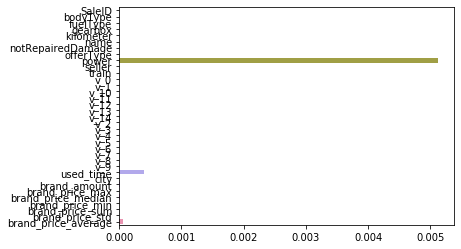

In [41]:
model = Lasso().fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continuous_feature_names)
#L1正则化有助于生成一个稀疏权值矩阵，进而可以用于特征选择。如下图，我们发现power与userd_time特征非常重要。

In [42]:
# 2.非线性模型
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [43]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [44]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
GradientBoostingRegressor is finished
MLPRegressor is finished
XGBRegressor is finished
LGBMRegressor is finished


In [45]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.191334,0.194875,0.141866,0.168374,155.459692,0.139165,0.141734
cv2,0.194983,0.195496,0.142336,0.172580,117.429447,0.140447,0.146117
cv3,0.195140,0.189343,0.141307,0.171581,169.326304,0.139733,0.144444
cv4,0.191834,0.190235,0.139619,0.169803,2090.411035,0.137646,0.142366
cv5,0.196965,0.196241,0.146730,0.173618,281.249406,0.141404,0.145424


In [46]:
# 模型调参

## LGB的参数集合：

objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']

num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

In [47]:
# 贪心调参
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_obj[obj] = score
    
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_leaves[leaves] = score
    
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    score = np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_depth[depth] = score

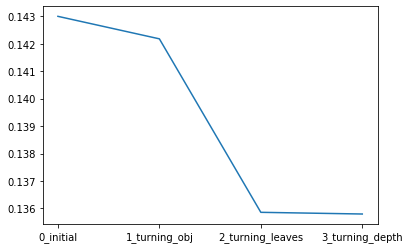

In [48]:
sns.lineplot(x=['0_initial','1_turning_obj','2_turning_leaves','3_turning_depth'], y=[0.143 ,min(best_obj.values()), min(best_leaves.values()), min(best_depth.values())])

In [49]:
# GridSearch调参
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {'objective': objective , 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model, parameters, cv=5)
clf = clf.fit(train_X, train_y)

In [51]:
clf.best_params_

{'max_depth': 15, 'num_leaves': 55, 'objective': 'regression'}

In [52]:
model = LGBMRegressor(objective='regression',
                          num_leaves=55,
                          max_depth=15)

In [53]:
np.mean(cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))

0.13777375306371478

In [58]:
! pip install -i https://pypi.tuna.tsinghua.edu.cn/simple bayesian-optimization

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [59]:
# 贝叶斯调参
from bayes_opt import BayesianOptimization

In [60]:
def rf_cv(num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
        ),
        X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val

In [61]:
rf_bo = BayesianOptimization(
    rf_cv,
    {
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples' : (2, 100)
    }
)

In [62]:
rf_bo.maximize()

|   iter    |  target   | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------
|  1        |  0.8606   |  8.549    |  41.0     |  42.08    |  0.7156   |
|  2        |  0.8655   |  73.85    |  5.916    |  62.85    |  0.7829   |
|  3        |  0.867    |  39.26    |  12.65    |  73.57    |  0.6892   |
|  4        |  0.8623   |  53.94    |  43.43    |  46.4     |  0.7893   |
|  5        |  0.8521   |  74.59    |  55.95    |  21.3     |  0.284    |
|  6        |  0.8058   |  2.189    |  98.11    |  99.45    |  0.2361   |
|  7        |  0.8008   |  9.084    |  2.531    |  3.7      |  0.4206   |
|  8        |  0.8691   |  99.72    |  50.32    |  99.86    |  0.1902   |
|  9        |  0.8668   |  42.59    |  13.91    |  72.23    |  0.27     |
|  10       |  0.7713   |  7.292    |  94.34    |  2.371    |  0.8029   |
|  11       |  0.8606   |  99.52    |  98.35    |  40.99    |  0.4149   |
|  12       |  0.8505   |  5.495    | 

In [63]:
1 - rf_bo.max['target']

0.13073212982887428

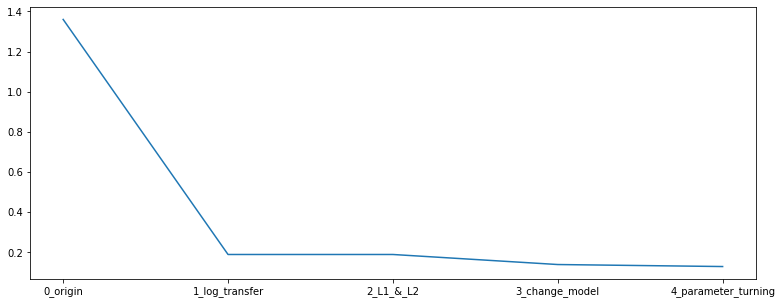

In [64]:
plt.figure(figsize=(13,5))
sns.lineplot(x=['0_origin','1_log_transfer','2_L1_&_L2','3_change_model','4_parameter_turning'], y=[1.36 ,0.19, 0.19, 0.14, 0.13])